# Customer support ticket data analysis

In [1]:
import pandas as pd
import os
import kagglehub

In [2]:
# Get path to the CSV data
download_path = kagglehub.dataset_download("suraj520/customer-support-ticket-dataset")
csv_files = [file for file in os.listdir(download_path) if file.endswith('.csv')]
file_path = os.path.join(download_path, csv_files[0])

# Download the customer support ticket dataset from Kaggle
df = pd.read_csv(file_path)

# Display dataset information
print(f"Dataset shape: {df.shape}")
print("First few rows of the dataset:")
df.head()

Dataset shape: (8469, 17)
First few rows of the dataset:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Exploratory Data Analysis

### Customer demographics

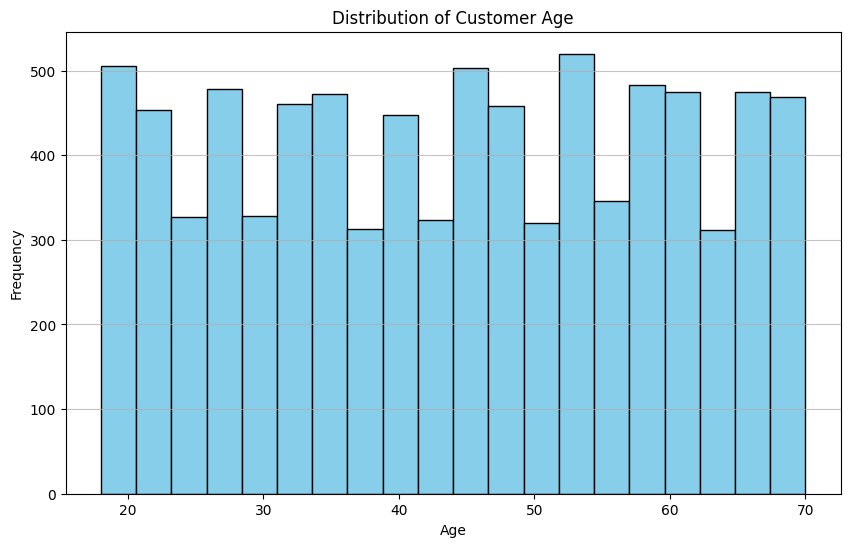

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Customer Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [4]:
gender_percentages = df['Customer Gender'].value_counts(normalize=True) * 100
print("\nGender Distribution (%):")
print(gender_percentages.round(2).to_string())


Gender Distribution (%):
Customer Gender
Male      34.20
Female    34.09
Other     31.72


Similar proportions of males and females. A relatively large proportion of other genders, which may include non-binary genders and missing values.

### Product-related semantic analysis

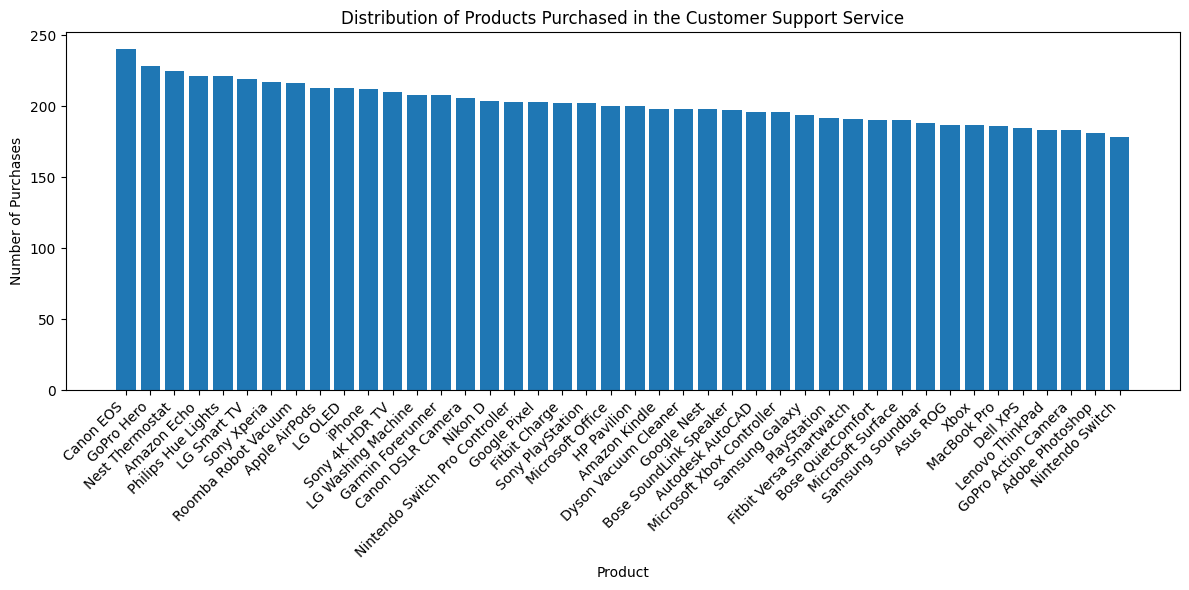


Top 5 Product Purchased in the Customer Support Service:
Product Purchased
Canon EOS             240
GoPro Hero            228
Nest Thermostat       225
Amazon Echo           221
Philips Hue Lights    221


In [5]:
# Product Purchased
product_counts = df['Product Purchased'].value_counts()

# Create a bar plot of product purchases
plt.figure(figsize=(12, 6))
plt.bar(product_counts.index, product_counts.values)
plt.title('Distribution of Products Purchased in the Customer Support Service')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count and display the frequency of each product purchased
print("\nTop 5 Product Purchased in the Customer Support Service:")
print(product_counts.head(5).to_string())

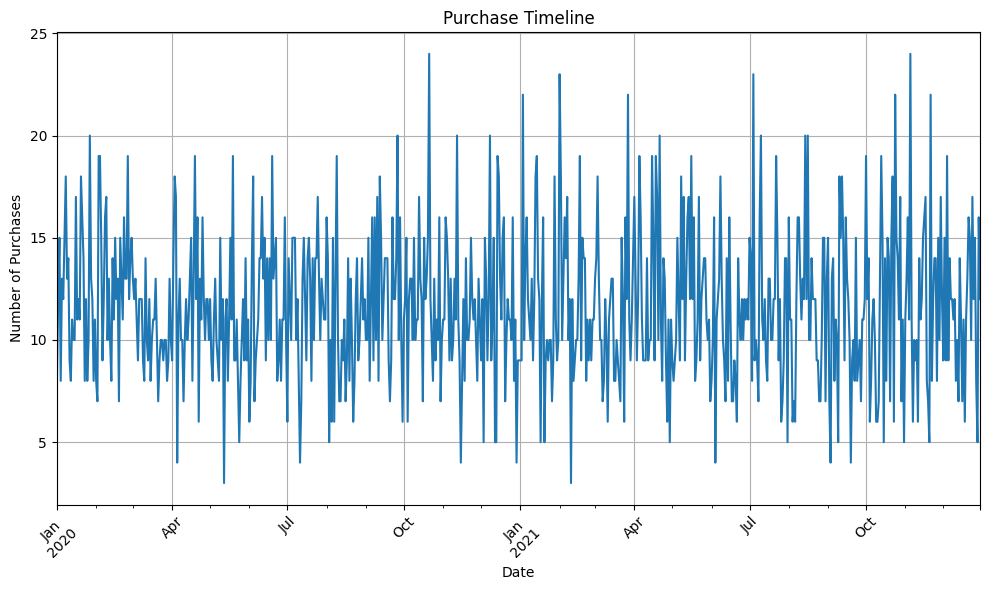

In [5]:
# Convert 'Date of Purchase' to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Create time series plot of purchases
plt.figure(figsize=(10, 6))
df['Date of Purchase'].value_counts().sort_index().plot(kind='line')
plt.title('Purchase Timeline')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Understand the dates of purchase for each product.

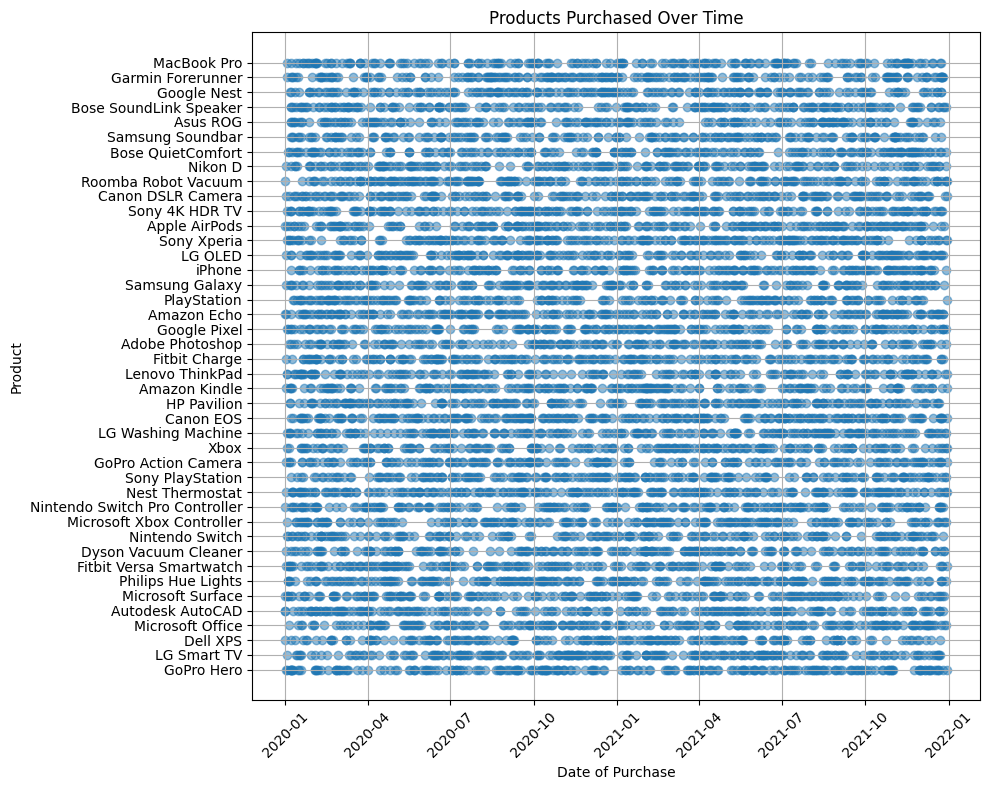

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Date of Purchase'], df['Product Purchased'], alpha=0.5)
plt.title('Products Purchased Over Time')
plt.xlabel('Date of Purchase')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Ticket-related analysis

(5, 16)


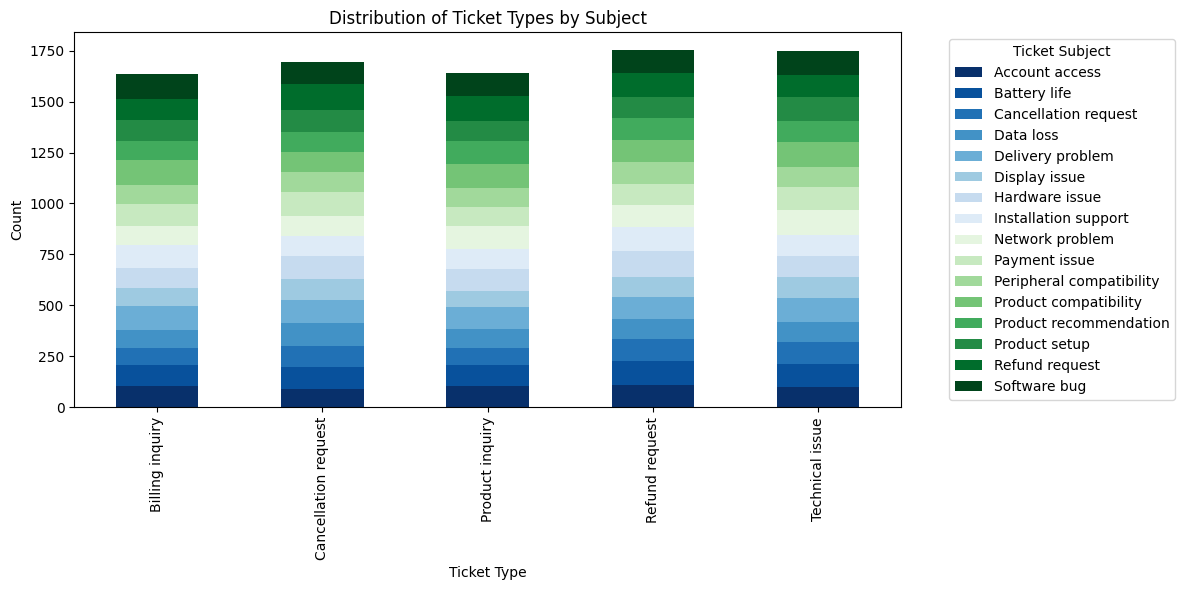

In [8]:
# Ticket Type	and Subject
ticket_distribution = pd.crosstab(df['Ticket Type'], df['Ticket Subject'])
print(ticket_distribution.shape)

colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
          '#e5f5e0', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
ticket_distribution.plot(kind='bar', figsize=(12, 6), stacked=True, color=colors)
plt.title('Distribution of Ticket Types by Subject')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.legend(title='Ticket Subject', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [9]:
# summarise ticket status
ticket_status_summary = df['Ticket Status'].value_counts()
print("\nTicket Status Summary:")
print(ticket_status_summary)


Ticket Status Summary:
Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64



Customer Satisfaction Rating Summary:
count    2769.000000
mean        2.991333
std         1.407016
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer Satisfaction Rating, dtype: float64


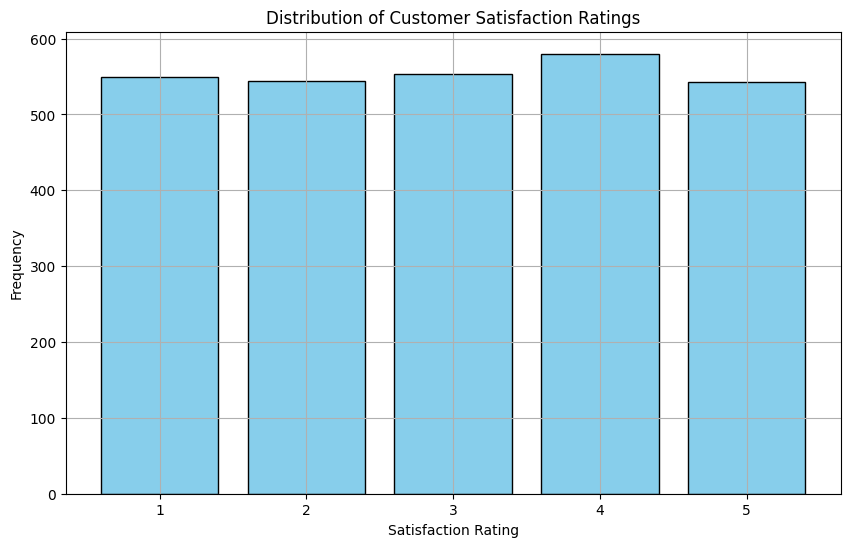


Distribution of Satisfaction Ratings (%):
Customer Satisfaction Rating
1.0    19.97
2.0    19.83
3.0    20.95
4.0    19.61
5.0    19.65
Name: proportion, dtype: float64


In [10]:
# customer satisfaction rating
satisfaction_summary = df['Customer Satisfaction Rating'].describe()
print("\nCustomer Satisfaction Rating Summary:")
print(satisfaction_summary)

# Create histogram of satisfaction ratings
plt.figure(figsize=(10, 6))
plt.bar(pd.factorize(df['Customer Satisfaction Rating'])[1], df['Customer Satisfaction Rating'].value_counts().sort_index(), color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate percentage distribution of ratings
satisfaction_dist = df['Customer Satisfaction Rating'].value_counts(normalize=True) * 100
print("\nDistribution of Satisfaction Ratings (%):")
print(satisfaction_dist.sort_index().round(2))

### Data preprocessing: date cleaning and text embedding

Drop the lines with no customer satisfaction factors and prepare data for modeling.

In [6]:
df = df.dropna(subset=['Customer Satisfaction Rating'])

In [7]:
# Convert First Response Time and Time to Resolution to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate time difference in hours
df['Resolution_Duration'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# Display summary statistics of resolution duration
print("\nResolution Duration Statistics (hours):")
print(df['Resolution_Duration'].describe().round(2))


Resolution Duration Statistics (hours):
count    2769.00
mean       -0.06
std         9.56
min       -23.23
25%        -6.93
50%         0.17
75%         6.48
max        23.47
Name: Resolution_Duration, dtype: float64


Text embedding of product purchased, ticket type, ticket subject, ticket description, resolution, ticket status	resolution, ticket priority, ticket channel.

In [8]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the text columns
text_columns = ['Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Channel']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in text_columns:
    df[col] = label_encoder.fit_transform(df[col])
# Encode the text columns
embeddings = []
for col in text_columns:
    embedding = model.encode(df[col].astype(str).tolist())
    embeddings.append(embedding)
# Concatenate the embeddings
embeddings = np.concatenate(embeddings, axis=1)

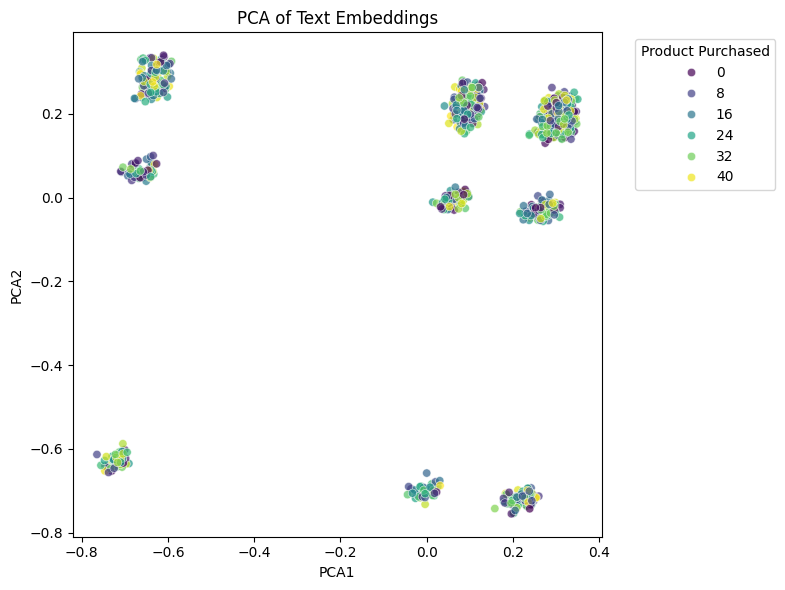

In [10]:
# Perform PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_embeddings, columns=['PCA1', 'PCA2'])
# Add the original labels to the PCA DataFrame
pca_df['Product Purchased'] = df['Product Purchased']
# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Product Purchased', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Text Embeddings')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Product Purchased', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [9]:
# Convert the embeddings to a DataFrame with meaningful column names
embedded_df = pd.DataFrame(embeddings, columns=[f'embed_{i}' for i in range(embeddings.shape[1])])

In [ ]:
nontext_columns = ['Customer Age', 'Customer Gender', 'Ticket Priority', 'Resolution_Duration', 'Customer Satisfaction Rating']
df_nontext = df[nontext_columns]

# Factorize categorical variables
df_nontext['Customer Gender'] = pd.factorize(df_nontext['Customer Gender'])[0]
df_nontext['Ticket Priority'] = pd.factorize(df_nontext['Ticket Priority'])[0]
df_nontext['Customer Satisfaction Rating'] = pd.factorize(df_nontext['Customer Satisfaction Rating'])[0]

In [11]:
# Reset index of df_nontext to ensure proper concatenation
df_nontext = df_nontext.reset_index(drop=True)

# Combine the embeddings with non-text features
combined_df = pd.concat([df_nontext, embedded_df], axis=1)
combined_df.head()

,Customer Age,Customer Gender,Ticket Priority,Resolution_Duration,Customer Satisfaction Rating,embed_0,embed_1,embed_2,embed_3,embed_4,...,embed_2678,embed_2679,embed_2680,embed_2681,embed_2682,embed_2683,embed_2684,embed_2685,embed_2686,embed_2687
0,48,0,0,6.850000,0,-0.099546,0.017195,-0.091329,0.029943,0.022936,...,0.082722,-0.023589,0.002033,-0.015865,-0.023060,0.010913,0.120558,0.029050,0.020761,0.008332
1,27,1,0,-5.533333,0,-0.000607,0.038072,-0.071322,0.019381,-0.053589,...,0.082722,-0.023589,0.002034,-0.015865,-0.023060,0.010913,0.120558,0.029050,0.020761,0.008332
2,67,1,0,19.683333,1,-0.041312,-0.006703,-0.031351,0.033672,0.003006,...,0.037845,0.039866,0.008070,0.024053,-0.023887,0.032896,0.096892,0.068412,0.009772,-0.006192
3,48,2,1,-17.916667,1,0.010536,0.041852,-0.096148,0.007280,-0.018718,...,0.068089,-0.007412,0.014302,0.020077,0.011782,0.009878,0.097168,0.059439,-0.033318,-0.007110
4,51,2,1,-2.633333,1,-0.035729,0.034011,-0.080501,0.047851,-0.078478,...,0.054736,-0.003360,-0.004491,0.040223,-0.068529,0.095878,0.065633,0.016712,-0.004362,-0.015344


## Modeling

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding

import torch
import numpy as np
import seaborn as sns
from datasets import Dataset

In [30]:
import tensorflow as tf
import os

# Try to limit GPU memory growth to avoid memory errors
try:
    # Set memory growth and limit TensorFlow GPU memory usage
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        print("GPUs found, setting memory growth...")
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Optionally limit GPU memory to avoid out-of-memory errors
        # tf.config.experimental.set_virtual_device_configuration(
        #     gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
        print(f"GPU configuration successful: {len(gpus)} GPU(s) available")
    else:
        print("No GPUs found, using CPU instead")
except Exception as e:
    print(f"Error configuring GPU: {e}")
    print("Falling back to CPU")
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force CPU usage

GPUs found, setting memory growth...
GPU configuration successful: 1 GPU(s) available


In [14]:
# Build a classification model to predict ticket rating categories

# Check current target distribution
print("\nCustomer Satisfaction Rating Distribution:")
print(combined_df['Customer Satisfaction Rating'].value_counts())

# Prepare features (X) and target (y) variables
X = combined_df.drop('Customer Satisfaction Rating', axis=1)
y = combined_df['Customer Satisfaction Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=719, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Customer Satisfaction Rating Distribution:
Customer Satisfaction Rating
0    580
1    553
4    549
3    544
2    543
Name: count, dtype: int64

Training set shape: (2076, 2692)
Test set shape: (693, 2692)


### Random forest

In [17]:
# Train a Random Forest model
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Training Random Forest Classifier...

Random Forest Accuracy: 0.2179

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.26      0.23       145
           1       0.19      0.22      0.20       139
           2       0.27      0.24      0.25       136
           3       0.23      0.20      0.21       136
           4       0.20      0.18      0.19       137

    accuracy                           0.22       693
   macro avg       0.22      0.22      0.22       693
weighted avg       0.22      0.22      0.22       693



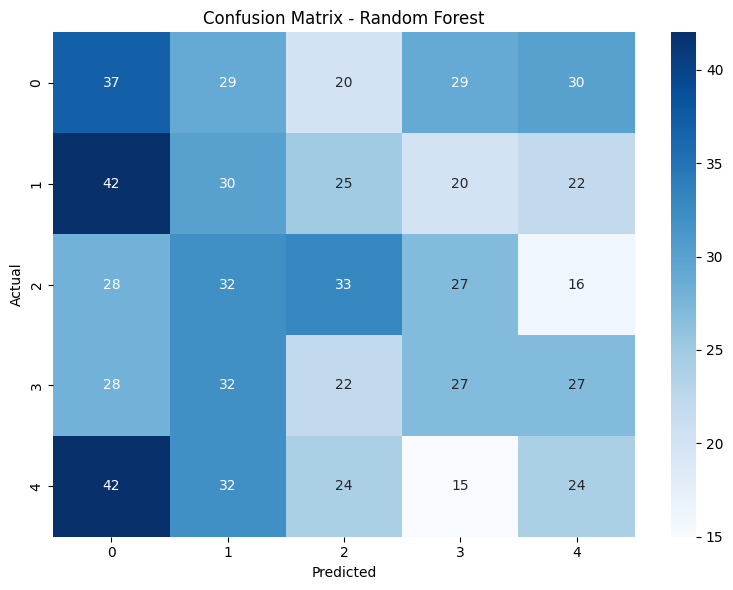

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Gradient Boosting

In [19]:
# Try Gradient Boosting for comparison
print("\nTraining Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Evaluate Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Training Gradient Boosting Classifier...

Gradient Boosting Accuracy: 0.1818

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20       145
           1       0.19      0.18      0.18       139
           2       0.17      0.16      0.17       136
           3       0.18      0.18      0.18       136
           4       0.17      0.18      0.17       137

    accuracy                           0.18       693
   macro avg       0.18      0.18      0.18       693
weighted avg       0.18      0.18      0.18       693



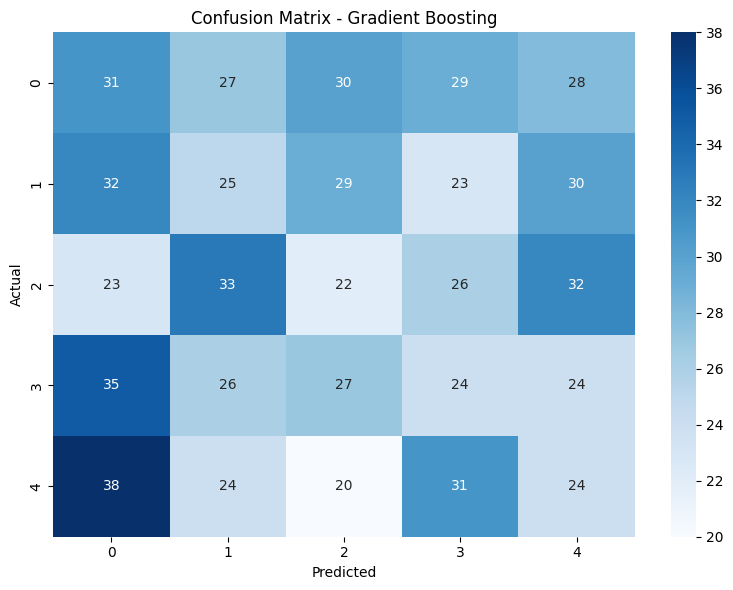

In [20]:
# compute comparison confusion matrix
plt.figure(figsize=(8, 6))
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Cross Validation

In [22]:
# Cross-validation to ensure model robustness
print("\nPerforming 5-fold cross-validation...")
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Random Forest CV Scores: {cv_scores_rf}")
print(f"Random Forest Average CV Score: {cv_scores_rf.mean():.4f}")
print(f"Gradient Boosting CV Scores: {cv_scores_gb}")
print(f"Gradient Boosting Average CV Score: {cv_scores_gb.mean():.4f}")


Performing 5-fold cross-validation...
Random Forest CV Scores: [0.18509615 0.21445783 0.2        0.21445783 0.22168675]
Random Forest Average CV Score: 0.2071
Gradient Boosting CV Scores: [0.21394231 0.19759036 0.19518072 0.22168675 0.21445783]
Gradient Boosting Average CV Score: 0.2086


## LLM solution

In [23]:
tf.config.set_soft_device_placement(True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Training set shape: (2215, 2692)
Test set shape: (554, 2692)


In [18]:
# Get unique classes and their mapping
unique_classes = sorted(y.unique())
n_classes = len(unique_classes)
print(f"Number of satisfaction rating classes: {n_classes}")
class_mapping = {class_val: i for i, class_val in enumerate(unique_classes)}
reverse_mapping = {i: class_val for i, class_val in enumerate(unique_classes)}

# Convert target to categorical for neural network
y_train_cat = to_categorical([class_mapping[val] for val in y_train])
y_test_cat = to_categorical([class_mapping[val] for val in y_test])

Number of satisfaction rating classes: 5


In [ ]:
# Neural Network model with Tensorflow
print("\nBuilding and training Neural Network model...")

# Define model architecture
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(n_classes, activation='softmax')
])

# Compile model
nn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Train the model
nn_history = nn_model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stopping],
    verbose=1
)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Neural Network Accuracy: 0.1715

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.16      0.17       116
           1       0.19      0.23      0.21       111
           2       0.13      0.06      0.09       108
           3       0.18      0.09      0.12       109
           4       0.16      0.31      0.21       110

    accuracy                           0.17       554
   macro avg       0.17      0.17      0.16       554
weighted avg       0.17      0.17      0.16       554



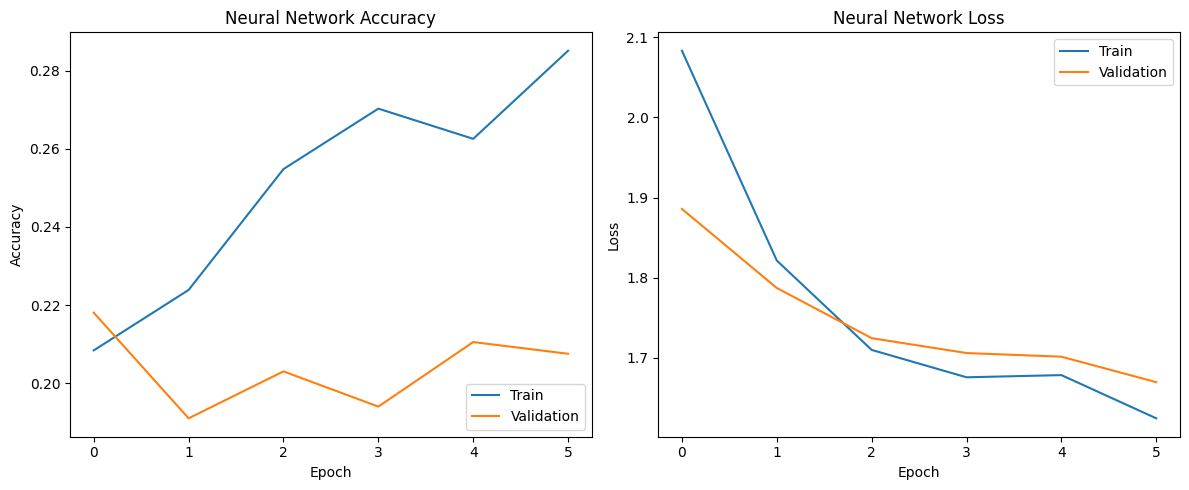

In [161]:
# Evaluate neural network model
y_pred_nn_prob = nn_model.predict(X_test_scaled)
y_pred_nn = np.array([reverse_mapping[np.argmax(pred)] for pred in y_pred_nn_prob])
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"\nNeural Network Accuracy: {accuracy_nn:.4f}")
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.title('Neural Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.title('Neural Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

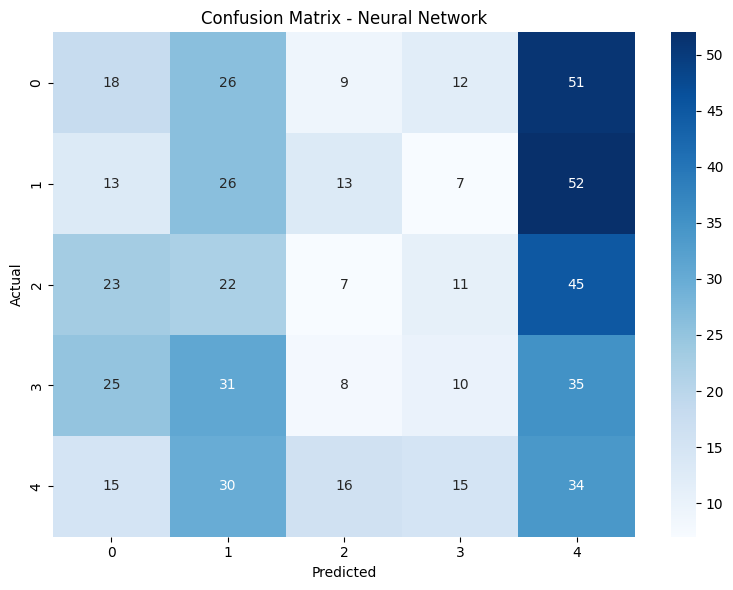

In [162]:
# Confusion matrix for neural network
plt.figure(figsize=(8, 6))
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

I'm not surprised the model does not perform well, since during exploratory data analysis, there's no obvious relationship between customer satisfaction rating and other variables.

### Transformer-based model approach

In [26]:
# combine text and non-text features
df_llm = pd.concat([df[nontext_columns], df[text_columns]], axis=1)

y = df_llm['Customer Satisfaction Rating']
X = df_llm.drop('Customer Satisfaction Rating', axis=1)
X.head()

,Customer Age,Customer Gender,Ticket Priority,Resolution_Duration,Product Purchased,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Channel
2,48,Other,Low,6.850000,10,4,8,53,0,343,3
3,27,Female,Low,-5.533333,25,0,0,627,0,2549,3
4,67,Female,Low,19.683333,5,0,3,188,0,2657,1
10,48,Male,High,-17.916667,30,1,3,1323,0,1368,2
11,51,Male,High,-2.633333,27,2,15,360,0,1366,0


In [41]:
# Function to prepare text data from the ticket data
def prepare_text_data(df):
    # Combine relevant text columns into a single text field
    return df['Ticket Description'].astype(str) + " " + df['Resolution'].astype(str) + " Product: " + df['Product Purchased'].astype(str)

In [42]:
# Get original text data from the dataframe for a sample (adjust as needed)
# For demonstration, we'll sample some data to make training faster
# In a production scenario, you might use the full dataset
sample_size = min(1000, len(df))
df_sample = df_llm.sample(sample_size, random_state=946)

# Prepare text and labels
texts = prepare_text_data(df_sample).reset_index(drop=True)
labels = pd.factorize(df_sample['Customer Satisfaction Rating'].reset_index(drop=True))[0]

# Split the data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=841, stratify=labels
)

In [67]:
# Load pre-trained tokenizer and model with authentication if available
model_name = "distilbert-base-uncased"  # A smaller, faster BERT variant
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

# Create PyTorch datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# Load the model with authentication
lm_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(set(labels))
)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
lm_model.to(device)

# Training arguments
batch_size = 32
training_args = TrainingArguments(
    output_dir='./transformer_results',
    num_train_epochs=3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./transformer_logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Initialize Trainer
trainer = Trainer(
    model=lm_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train the model
print("\nTraining transformer model...")
trainer.train() # wandb.ai API required

# Evaluate the model
print("\nEvaluating transformer model...")
preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

# Calculate and display metrics
accuracy_lm = accuracy_score(test_labels, preds)
f1 = f1_score(test_labels, preds, average='weighted')

print(f"Transformer Model Accuracy: {accuracy_lm:.4f}")
print(f"Transformer Model F1 Score: {f1:.4f}")
print("\nTransformer Model Classification Report:")
print(classification_report(test_labels, preds))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-67-4d247896fd29>:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Using device: cuda

Training transformer model...


Epoch,Training Loss,Validation Loss
1,1.609200,1.609292
2,1.603100,1.608916
3,1.610900,1.608695



Evaluating transformer model...


Transformer Model Accuracy: 0.2100
Transformer Model F1 Score: 0.1248

Transformer Model Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.38      0.31        42
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        40
           3       0.19      0.63      0.29        41
           4       0.00      0.00      0.00        39

    accuracy                           0.21       200
   macro avg       0.09      0.20      0.12       200
weighted avg       0.09      0.21      0.12       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
accuracy_rf = 0.2179
accuracy_gb = 0.1818
accuracy_nn = 0.1715

# Model comparison
print("\n" + "="*50)
print("Model Performance Comparison")
print("="*50)
models = ["Random Forest", "Gradient Boosting", "Neural Network"]
accuracies = [accuracy_rf, accuracy_gb, accuracy_nn]

# Add transformer model if it was successfully trained
try:
    if 'accuracy_lm' in locals():
        models.append("Transformer LLM")
        accuracies.append(accuracy_lm)
except:
    pass


Model Performance Comparison


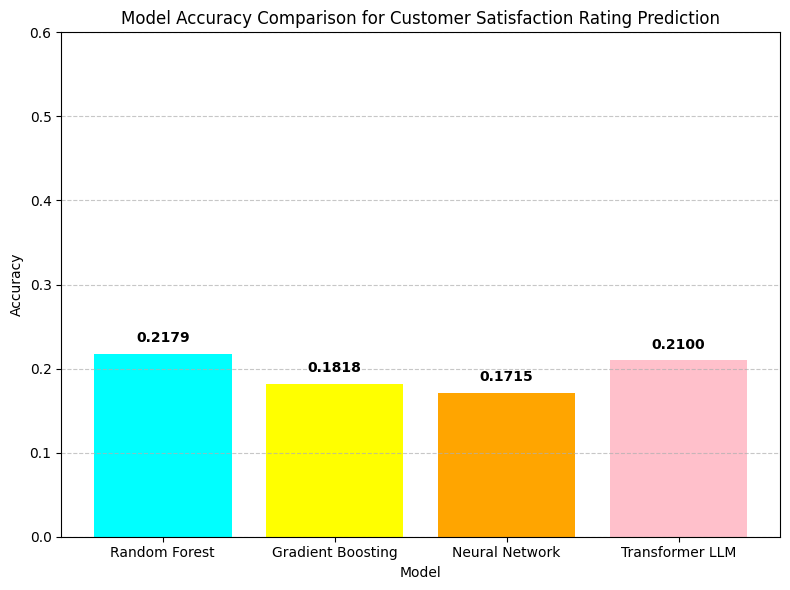

In [69]:
# Create bar chart comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['cyan', 'yellow', 'orange', 'pink'][:len(models)])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Model Accuracy Comparison for Customer Satisfaction Rating Prediction')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Determine the best model
best_model_name = models[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nBest performing model: {best_model_name} with accuracy {best_accuracy:.4f}")

# Save the neural network model if requested
save_nn = input("\nDo you want to save the neural network model? (y/n): ")
if save_nn.lower() == 'y':
    nn_model.save('ticket_rating_neural_network.h5')
    print("Neural network model saved as 'ticket_rating_neural_network.h5'")

print("\nCustomer Support Ticket Analysis and Rating Prediction Complete!")